In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.filterwarnings('ignore')

# Configuração de visualizações
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


# ==============================
# 1. CARREGAMENTO DO DATASET
# ==============================

def carregar_dados(caminho):
    """
    Carrega o dataset a partir do caminho especificado.

    Args:
        caminho (str): Caminho do arquivo CSV

    Returns:
        pd.DataFrame: DataFrame com os dados carregados
    """
    df = pd.read_csv(caminho)
    print("Dataset carregado com sucesso!")
    print(f"Dimensões: {df.shape[0]} linhas e {df.shape[1]} colunas\n")
    return df


# Caminho direto do CSV no Kaggle
caminho_csv = "/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv"

df = carregar_dados(caminho_csv)

print("=" * 80)
print("PRIMEIRAS 5 LINHAS DO DATASET")
print("=" * 80)
display(df.head())

print("\n" + "=" * 80)
print("INFORMAÇÕES GERAIS DO DATASET")
print("=" * 80)
df.info()

Dataset carregado com sucesso!
Dimensões: 1000 linhas e 16 colunas

PRIMEIRAS 5 LINHAS DO DATASET


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"



INFORMAÇÕES GERAIS DO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


ANÁLISE EXPLORATÓRIA DOS DADOS

Primeiras linhas do dataset:
                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4    

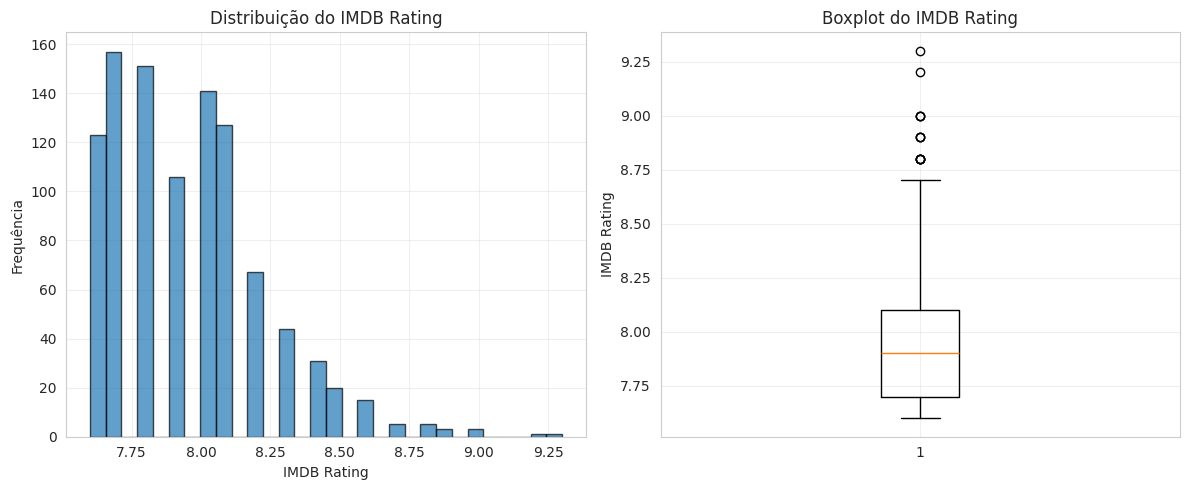

In [2]:
# ==============================
# 2. ANÁLISE EXPLORATÓRIA
# ==============================

def analise_exploratoria(df):
    """
    Realiza análise exploratória inicial do dataset.

    Args:
        df (pd.DataFrame): DataFrame a ser analisado
    """

    print("=" * 60)
    print("ANÁLISE EXPLORATÓRIA DOS DADOS")
    print("=" * 60)

    # Informações gerais
    print("\nPrimeiras linhas do dataset:")
    print(df.head())

    print("\n\nInformações sobre as colunas:")
    print(df.info())

    print("\n\nEstatísticas descritivas:")
    print(df.describe())

    print("\n\nValores ausentes por coluna:")
    print(df.isnull().sum())

    # Análise da variável alvo
    print("\n\nEstatísticas da variável alvo (IMDB_Rating):")
    print(df['IMDB_Rating'].describe())

    # Visualização da distribuição da variável alvo
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(df['IMDB_Rating'], bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel('IMDB Rating')
    plt.ylabel('Frequência')
    plt.title('Distribuição do IMDB Rating')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.boxplot(df['IMDB_Rating'])
    plt.ylabel('IMDB Rating')
    plt.title('Boxplot do IMDB Rating')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


analise_exploratoria(df)

In [3]:
# ==============================
# 3. LIMPEZA E PREPARAÇÃO DOS DADOS
# ==============================

def limpar_runtime(valor):
    """
    Converte a coluna Runtime para formato numérico.

    Args:
        valor (str): Valor no formato '142 min'

    Returns:
        float: Valor numérico em minutos
    """
    if pd.isna(valor):
        return np.nan
    try:
        return float(str(valor).replace(' min', '').strip())
    except:
        return np.nan


def preparar_dados(df):
    """
    Realiza a limpeza e preparação dos dados para modelagem.

    Args:
        df (pd.DataFrame): DataFrame original

    Returns:
        pd.DataFrame: DataFrame preparado
    """

    print("\n" + "=" * 60)
    print("PREPARAÇÃO DOS DADOS")
    print("=" * 60)

    # Criar cópia para não modificar o original
    df_prep = df.copy()

    # Converter Runtime para numérico
    df_prep['Runtime'] = df_prep['Runtime'].apply(limpar_runtime)
    print("\nColuna 'Runtime' convertida para formato numérico.")

    # Converter Meta_score para numérico
    df_prep['Meta_score'] = pd.to_numeric(df_prep['Meta_score'], errors='coerce')
    print("Coluna 'Meta_score' convertida para formato numérico.")

    # Limpar No_of_Votes (remover vírgulas)
    if df_prep['No_of_Votes'].dtype == 'object':
        df_prep['No_of_Votes'] = df_prep['No_of_Votes'].str.replace(',', '')
        df_prep['No_of_Votes'] = pd.to_numeric(df_prep['No_of_Votes'], errors='coerce')
        print("Coluna 'No_of_Votes' convertida para formato numérico.")

    # Converter Released_Year para numérico
    df_prep['Released_Year'] = pd.to_numeric(df_prep['Released_Year'], errors='coerce')
    print("Coluna 'Released_Year' convertida para formato numérico.")

    # Remover linhas onde IMDB_Rating está ausente (variável alvo)
    df_prep = df_prep.dropna(subset=['IMDB_Rating'])
    print("\nLinhas com IMDB_Rating ausente removidas.")

    # Tratar valores ausentes em features numéricas com a mediana
    numeric_features = ['Runtime', 'Meta_score', 'No_of_Votes', 'Released_Year']
    for feature in numeric_features:
        if df_prep[feature].isnull().sum() > 0:
            mediana = df_prep[feature].median()
            df_prep[feature].fillna(mediana, inplace=True)
            print(f"Valores ausentes em '{feature}' preenchidos com a mediana: {mediana}")

    print(f"\nDimensões após limpeza: {df_prep.shape[0]} linhas e {df_prep.shape[1]} colunas")

    return df_prep


def codificar_categoricas(df):
    """
    Codifica variáveis categóricas utilizando Label Encoding.

    Args:
        df (pd.DataFrame): DataFrame com dados preparados

    Returns:
        pd.DataFrame: DataFrame com variáveis codificadas
        dict: Dicionário de encoders utilizados
    """

    print("\n" + "=" * 60)
    print("CODIFICAÇÃO DE VARIÁVEIS CATEGÓRICAS")
    print("=" * 60)

    df_encoded = df.copy()
    encoders = {}

    # Codificar Certificate
    if 'Certificate' in df_encoded.columns:
        df_encoded['Certificate'].fillna('Unknown', inplace=True)
        le_cert = LabelEncoder()
        df_encoded['Certificate_Encoded'] = le_cert.fit_transform(df_encoded['Certificate'])
        encoders['Certificate'] = le_cert
        print(f"Coluna 'Certificate' codificada. Categorias únicas: {len(le_cert.classes_)}")

    # Processar Genre (pegar apenas o primeiro gênero)
    if 'Genre' in df_encoded.columns:
        df_encoded['Genre_Primary'] = df_encoded['Genre'].apply(
            lambda x: str(x).split(',')[0].strip() if pd.notna(x) else 'Unknown'
        )
        le_genre = LabelEncoder()
        df_encoded['Genre_Encoded'] = le_genre.fit_transform(df_encoded['Genre_Primary'])
        encoders['Genre'] = le_genre
        print(f"Coluna 'Genre' processada e codificada. Gêneros únicos: {len(le_genre.classes_)}")

    return df_encoded, encoders


#FUNÇÕES

df_prep = preparar_dados(df)
df_encoded, encoders = codificar_categoricas(df_prep)


PREPARAÇÃO DOS DADOS

Coluna 'Runtime' convertida para formato numérico.
Coluna 'Meta_score' convertida para formato numérico.
Coluna 'Released_Year' convertida para formato numérico.

Linhas com IMDB_Rating ausente removidas.
Valores ausentes em 'Meta_score' preenchidos com a mediana: 79.0
Valores ausentes em 'Released_Year' preenchidos com a mediana: 1999.0

Dimensões após limpeza: 1000 linhas e 16 colunas

CODIFICAÇÃO DE VARIÁVEIS CATEGÓRICAS
Coluna 'Certificate' codificada. Categorias únicas: 17
Coluna 'Genre' processada e codificada. Gêneros únicos: 14



SELEÇÃO DE FEATURES

Features selecionadas: ['Runtime', 'Meta_score', 'No_of_Votes', 'Released_Year', 'Certificate_Encoded', 'Genre_Encoded']
Dimensões de X: (1000, 6)
Dimensões de y: (1000,)

Correlação das features com IMDB_Rating:
IMDB_Rating            1.000000
No_of_Votes            0.494979
Meta_score             0.258650
Runtime                0.243096
Genre_Encoded          0.044005
Certificate_Encoded   -0.027021
Released_Year         -0.131364
Name: IMDB_Rating, dtype: float64


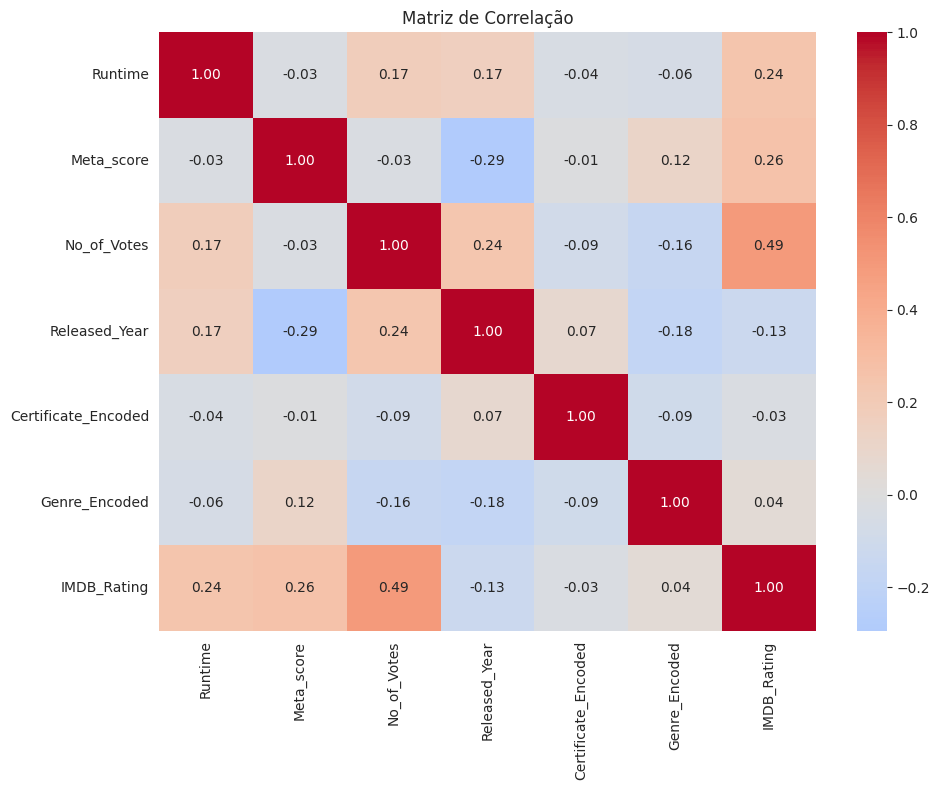

In [4]:
# 4. SELEÇÃO DE FEATURES
# ==============================

def selecionar_features(df):
    """
    Seleciona as features relevantes para o modelo.

    Args:
        df (pd.DataFrame): DataFrame com dados codificados

    Returns:
        pd.DataFrame: Features selecionadas (X)
        pd.Series: Variável alvo (y)
    """

    print("\n" + "=" * 60)
    print("SELEÇÃO DE FEATURES")
    print("=" * 60)

    # Features selecionadas
    features_selecionadas = [
        'Runtime',
        'Meta_score',
        'No_of_Votes',
        'Released_Year',
        'Certificate_Encoded',
        'Genre_Encoded'
    ]

    X = df[features_selecionadas]
    y = df['IMDB_Rating']

    print(f"\nFeatures selecionadas: {features_selecionadas}")
    print(f"Dimensões de X: {X.shape}")
    print(f"Dimensões de y: {y.shape}")

    # Correlação com a variável alvo
    print("\nCorrelação das features com IMDB_Rating:")
    correlacoes = df[features_selecionadas + ['IMDB_Rating']].corr()['IMDB_Rating'].sort_values(ascending=False)
    print(correlacoes)

    # Visualizar matriz de correlação
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[features_selecionadas + ['IMDB_Rating']].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title("Matriz de Correlação")
    plt.tight_layout()
    plt.show()

    return X, y


#FUNÇÃO
X, y = selecionar_features(df_encoded)

In [5]:
# 5. SEPARAÇÃO TREINO E TESTE
# ==============================

def separar_dados(X, y, test_size=0.2, random_state=42):
    """
    Separa os dados em conjuntos de treino e teste.

    Args:
        X (pd.DataFrame): Features
        y (pd.Series): Variável alvo
        test_size (float): Proporção do conjunto de teste
        random_state (int): Seed para reprodutibilidade

    Returns:
        tuple: X_train, X_test, y_train, y_test
    """

    print("\n" + "=" * 60)
    print("SEPARAÇÃO DOS DADOS")
    print("=" * 60)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    print(f"\nDados de treino: {X_train.shape[0]} amostras")
    print(f"Dados de teste: {X_test.shape[0]} amostras")
    print(f"Proporção de teste: {test_size * 100:.0f}%")

    return X_train, X_test, y_train, y_test


#FUNÇÃO
X_train, X_test, y_train, y_test = separar_dados(X, y)


SEPARAÇÃO DOS DADOS

Dados de treino: 800 amostras
Dados de teste: 200 amostras
Proporção de teste: 20%


In [6]:
# 6. TREINAMENTO DOS MODELOS
# ==============================

def treinar_regressao_linear(X_train, y_train):
    """
    Treina um modelo de Regressão Linear.
    """

    print("\n" + "=" * 60)
    print("TREINAMENTO - REGRESSÃO LINEAR")
    print("=" * 60)

    modelo_lr = LinearRegression()
    modelo_lr.fit(X_train, y_train)

    print("\nModelo de Regressão Linear treinado com sucesso!")
    print(f"Intercepto: {modelo_lr.intercept_:.4f}")
    print("\nCoeficientes:")
    for feature, coef in zip(X_train.columns, modelo_lr.coef_):
        print(f"{feature}: {coef:.4f}")

    return modelo_lr


def treinar_random_forest(X_train, y_train, n_estimators=100, random_state=42):
    """
    Treina um modelo Random Forest Regressor.
    """

    print("\n" + "=" * 60)
    print("TREINAMENTO - RANDOM FOREST")
    print("=" * 60)

    modelo_rf = RandomForestRegressor(
        n_estimators=n_estimators,
        random_state=random_state,
        n_jobs=-1
    )

    modelo_rf.fit(X_train, y_train)

    print("\nModelo Random Forest treinado com sucesso!")
    print(f"Número de árvores: {n_estimators}")

    print("\nImportância das features:")
    importancias = (
        pd.DataFrame({
            'Feature': X_train.columns,
            'Importância': modelo_rf.feature_importances_
        })
        .sort_values('Importância', ascending=False)
    )

    print(importancias.to_string(index=False))

    return modelo_rf


# FUNÇÕES
modelo_lr = treinar_regressao_linear(X_train, y_train)
modelo_rf = treinar_random_forest(X_train, y_train)


TREINAMENTO - REGRESSÃO LINEAR

Modelo de Regressão Linear treinado com sucesso!
Intercepto: 12.7990

Coeficientes:
Runtime: 0.0020
Meta_score: 0.0044
No_of_Votes: 0.0000
Released_Year: -0.0028
Certificate_Encoded: 0.0025
Genre_Encoded: 0.0115

TREINAMENTO - RANDOM FOREST

Modelo Random Forest treinado com sucesso!
Número de árvores: 100

Importância das features:
            Feature  Importância
        No_of_Votes     0.476428
      Released_Year     0.165188
         Meta_score     0.151703
            Runtime     0.122240
      Genre_Encoded     0.044211
Certificate_Encoded     0.040231


In [7]:
# 7. AVALIAÇÃO DOS MODELOS
# ==============================

def avaliar_modelo(modelo, X_train, X_test, y_train, y_test, nome_modelo):
    """
    Avalia o desempenho do modelo utilizando métricas.
    """

    # Predições
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)

    # Métricas de treino
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)

    # Métricas de teste
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)

    print(f"\n{nome_modelo} - Métricas de Desempenho")
    print("=" * 50)
    print("TREINO:")
    print(f"  RMSE: {rmse_train:.4f}")
    print(f"  R²:   {r2_train:.4f}")
    print("\nTESTE:")
    print(f"  RMSE: {rmse_test:.4f}")
    print(f"  R²:   {r2_test:.4f}")

    return {
        'nome': nome_modelo,
        'rmse_train': rmse_train,
        'r2_train': r2_train,
        'rmse_test': rmse_test,
        'r2_test': r2_test,
        'y_test_pred': y_test_pred
    }


# FUNÇÕES
resultado_lr = avaliar_modelo(
    modelo_lr,
    X_train, X_test,
    y_train, y_test,
    nome_modelo="Regressão Linear"
)

resultado_rf = avaliar_modelo(
    modelo_rf,
    X_train, X_test,
    y_train, y_test,
    nome_modelo="Random Forest"
)

# Agrupar resultados
resultados = [resultado_lr, resultado_rf]


Regressão Linear - Métricas de Desempenho
TREINO:
  RMSE: 0.2128
  R²:   0.4244

TESTE:
  RMSE: 0.2173
  R²:   0.2632

Random Forest - Métricas de Desempenho
TREINO:
  RMSE: 0.0733
  R²:   0.9317

TESTE:
  RMSE: 0.2059
  R²:   0.3389



COMPARAÇÃO DOS MODELOS

             nome  rmse_train  r2_train  rmse_test  r2_test
Regressão Linear    0.212833  0.424374   0.217324 0.263234
   Random Forest    0.073320  0.931686   0.205870 0.338851


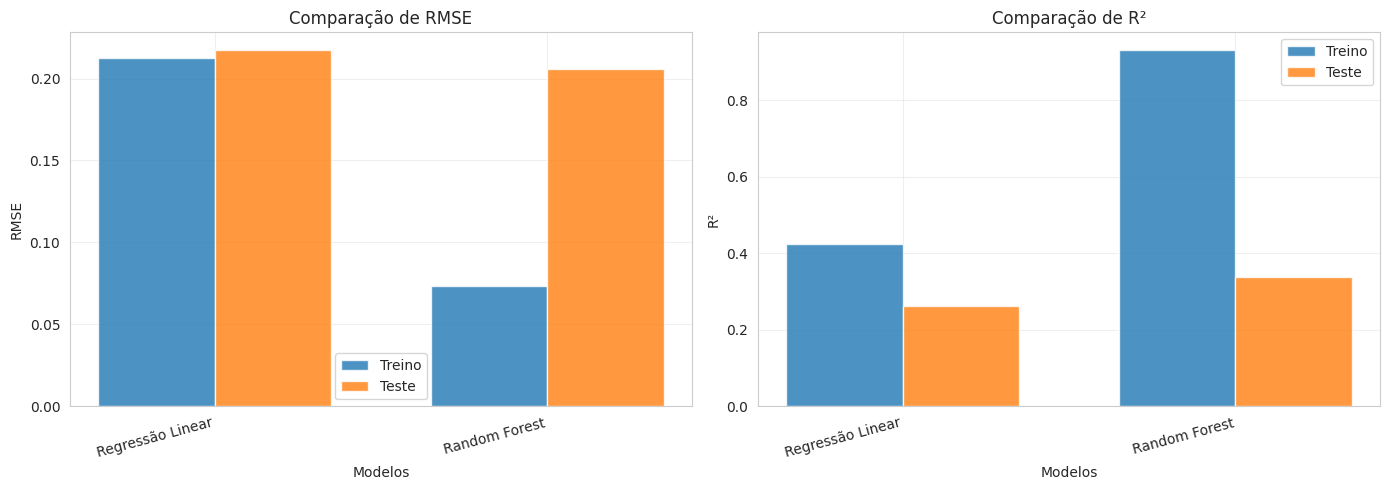


VISUALIZAÇÃO DAS PREDIÇÕES


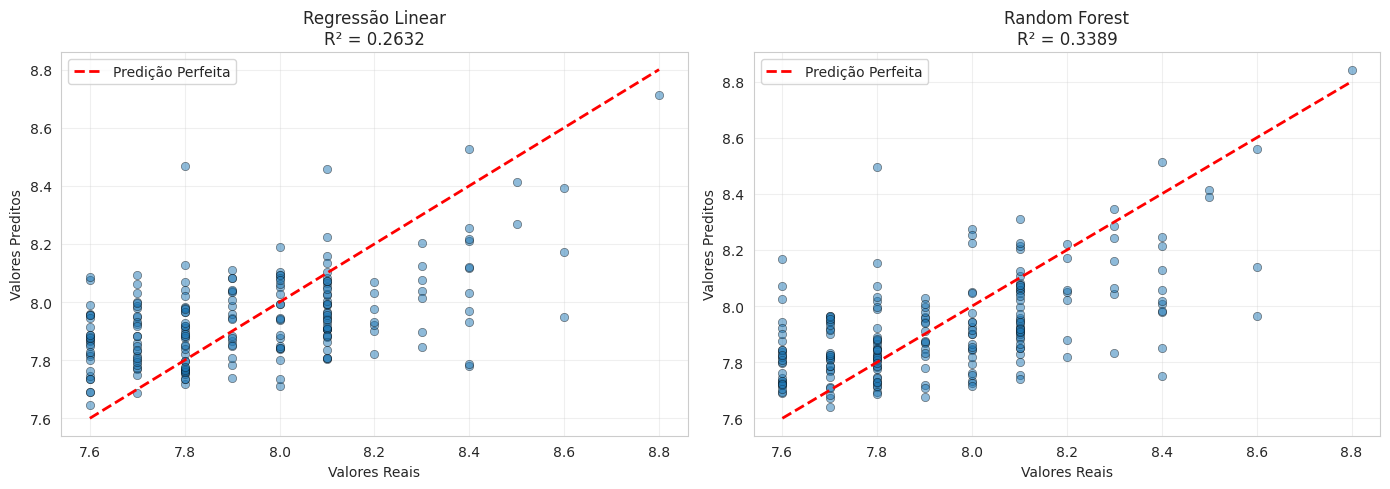

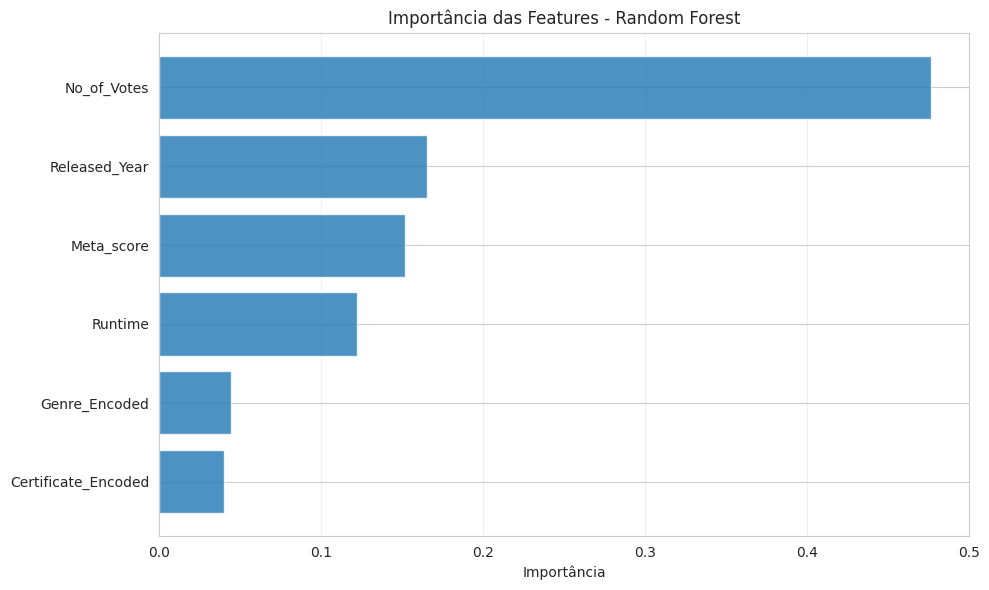

In [8]:
# 8. COMPARAÇÃO E VISUALIZAÇÃO
# ============================

def comparar_modelos(resultados):
    """
    Compara os resultados de múltiplos modelos.

    Args:
        resultados (list): Lista de dicionários com resultados
    """
    print("\n" + "=" * 60)
    print("COMPARAÇÃO DOS MODELOS")
    print("=" * 60)

    df_comparacao = pd.DataFrame(resultados)
    df_comparacao = df_comparacao[
        ['nome', 'rmse_train', 'r2_train', 'rmse_test', 'r2_test']
    ]

    print("\n", df_comparacao.to_string(index=False))

    # Visualização comparativa
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Comparação RMSE
    modelos = df_comparacao['nome']
    x_pos = np.arange(len(modelos))
    width = 0.35

    axes[0].bar(x_pos - width/2, df_comparacao['rmse_train'], width, label='Treino', alpha=0.8)
    axes[0].bar(x_pos + width/2, df_comparacao['rmse_test'], width, label='Teste', alpha=0.8)
    axes[0].set_xlabel('Modelos')
    axes[0].set_ylabel('RMSE')
    axes[0].set_title('Comparação de RMSE')
    axes[0].set_xticks(x_pos)
    axes[0].set_xticklabels(modelos, rotation=15, ha='right')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Comparação R²
    axes[1].bar(x_pos - width/2, df_comparacao['r2_train'], width, label='Treino', alpha=0.8)
    axes[1].bar(x_pos + width/2, df_comparacao['r2_test'], width, label='Teste', alpha=0.8)
    axes[1].set_xlabel('Modelos')
    axes[1].set_ylabel('R²')
    axes[1].set_title('Comparação de R²')
    axes[1].set_xticks(x_pos)
    axes[1].set_xticklabels(modelos, rotation=15, ha='right')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


def visualizar_predicoes(y_test, resultados):
    """
    Visualiza as predições versus valores reais.

    Args:
        y_test (pd.Series): Valores reais
        resultados (list): Lista de resultados dos modelos
    """
    print("\n" + "=" * 60)
    print("VISUALIZAÇÃO DAS PREDIÇÕES")
    print("=" * 60)

    n_modelos = len(resultados)
    fig, axes = plt.subplots(1, n_modelos, figsize=(7 * n_modelos, 5))

    if n_modelos == 1:
        axes = [axes]

    for idx, resultado in enumerate(resultados):
        ax = axes[idx]
        y_pred = resultado['y_test_pred']

        ax.scatter(y_test, y_pred, alpha=0.5, edgecolors='k', linewidth=0.5)
        ax.plot(
            [y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
            'r--', lw=2, label='Predição Perfeita'
        )

        ax.set_xlabel('Valores Reais')
        ax.set_ylabel('Valores Preditos')
        ax.set_title(f"{resultado['nome']}\nR² = {resultado['r2_test']:.4f}")
        ax.legend()
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


def visualizar_importancia_features(modelo_rf, feature_names):
    """
    Visualiza a importância das features do Random Forest.

    Args:
        modelo_rf: Modelo Random Forest treinado
        feature_names: Nomes das features
    """
    importancias = pd.DataFrame({
        'Feature': feature_names,
        'Importância': modelo_rf.feature_importances_
    }).sort_values('Importância', ascending=True)

    plt.figure(figsize=(10, 6))
    plt.barh(importancias['Feature'], importancias['Importância'], alpha=0.8)
    plt.xlabel('Importância')
    plt.title('Importância das Features - Random Forest')
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()


# EXECUÇÃO
comparar_modelos(resultados)
visualizar_predicoes(y_test, resultados)

feature_names = X_train.columns
visualizar_importancia_features(modelo_rf, feature_names)

Dataset carregado com sucesso!
Dimensões: 1000 linhas e 16 colunas

ANÁLISE EXPLORATÓRIA DOS DADOS

Primeiras linhas do dataset:
                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime,

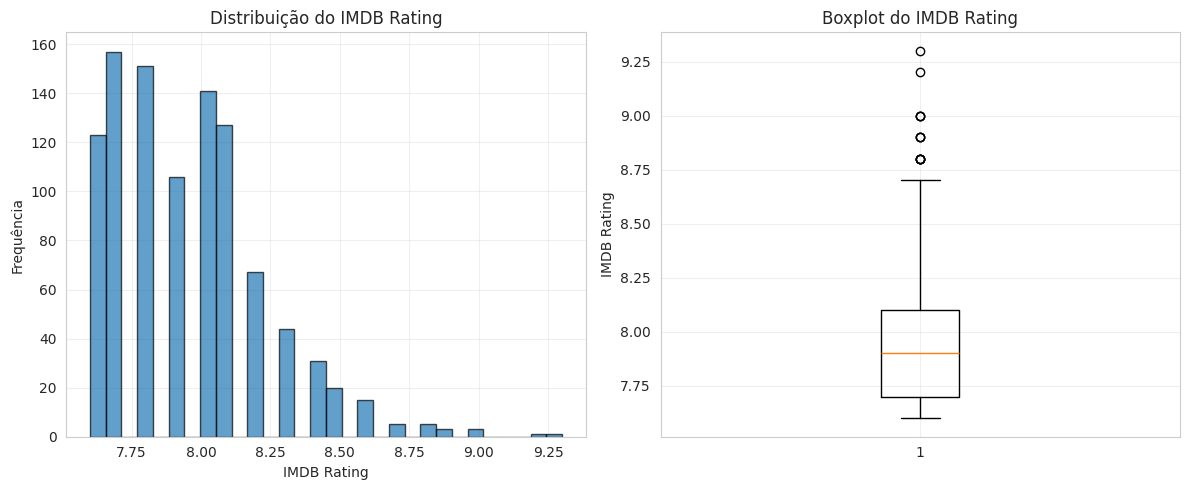


PREPARAÇÃO DOS DADOS

Coluna 'Runtime' convertida para formato numérico.
Coluna 'Meta_score' convertida para formato numérico.
Coluna 'Released_Year' convertida para formato numérico.

Linhas com IMDB_Rating ausente removidas.
Valores ausentes em 'Meta_score' preenchidos com a mediana: 79.0
Valores ausentes em 'Released_Year' preenchidos com a mediana: 1999.0

Dimensões após limpeza: 1000 linhas e 16 colunas

CODIFICAÇÃO DE VARIÁVEIS CATEGÓRICAS
Coluna 'Certificate' codificada. Categorias únicas: 17
Coluna 'Genre' processada e codificada. Gêneros únicos: 14

SELEÇÃO DE FEATURES

Features selecionadas: ['Runtime', 'Meta_score', 'No_of_Votes', 'Released_Year', 'Certificate_Encoded', 'Genre_Encoded']
Dimensões de X: (1000, 6)
Dimensões de y: (1000,)

Correlação das features com IMDB_Rating:
IMDB_Rating            1.000000
No_of_Votes            0.494979
Meta_score             0.258650
Runtime                0.243096
Genre_Encoded          0.044005
Certificate_Encoded   -0.027021
Released

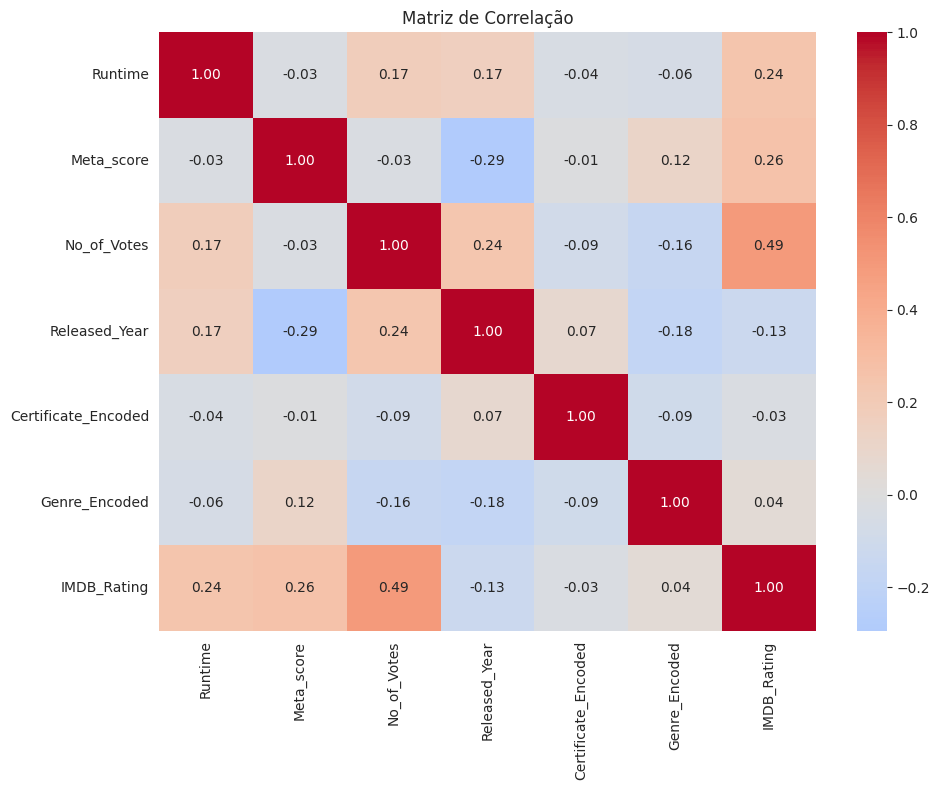


SEPARAÇÃO DOS DADOS

Dados de treino: 800 amostras
Dados de teste: 200 amostras
Proporção de teste: 20%

TREINAMENTO - REGRESSÃO LINEAR

Modelo de Regressão Linear treinado com sucesso!
Intercepto: 12.7990

Coeficientes:
Runtime: 0.0020
Meta_score: 0.0044
No_of_Votes: 0.0000
Released_Year: -0.0028
Certificate_Encoded: 0.0025
Genre_Encoded: 0.0115

TREINAMENTO - RANDOM FOREST

Modelo Random Forest treinado com sucesso!
Número de árvores: 100

Importância das features:
            Feature  Importância
        No_of_Votes     0.476428
      Released_Year     0.165188
         Meta_score     0.151703
            Runtime     0.122240
      Genre_Encoded     0.044211
Certificate_Encoded     0.040231

AVALIAÇÃO DOS MODELOS

Regressão Linear - Métricas de Desempenho
TREINO:
  RMSE: 0.2128
  R²:   0.4244

TESTE:
  RMSE: 0.2173
  R²:   0.2632

Random Forest - Métricas de Desempenho
TREINO:
  RMSE: 0.0733
  R²:   0.9317

TESTE:
  RMSE: 0.2059
  R²:   0.3389

COMPARAÇÃO DOS MODELOS

             

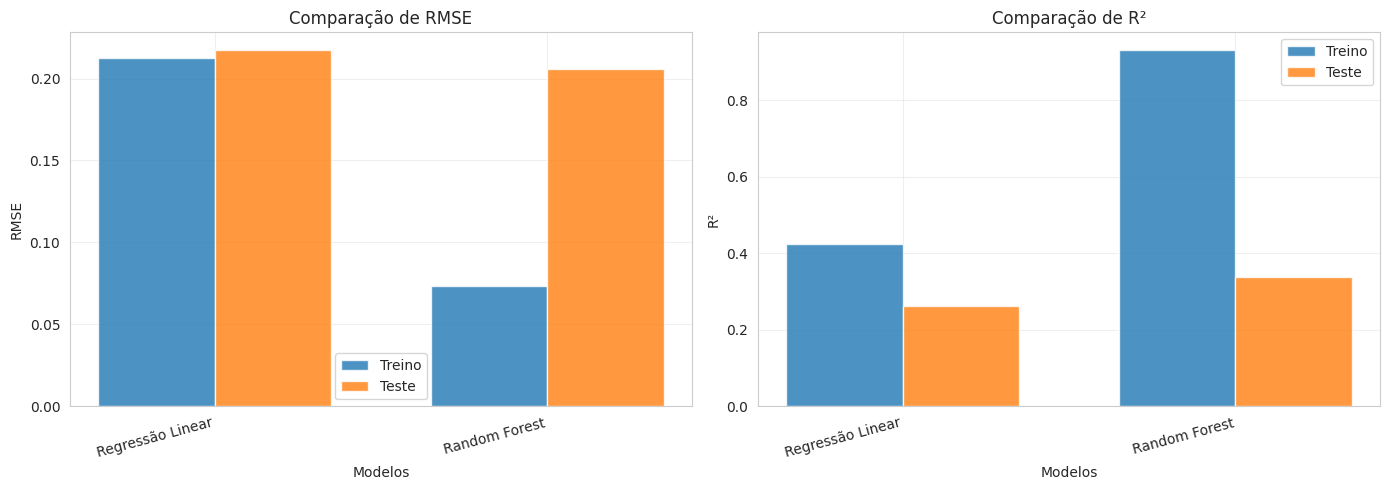


VISUALIZAÇÃO DAS PREDIÇÕES


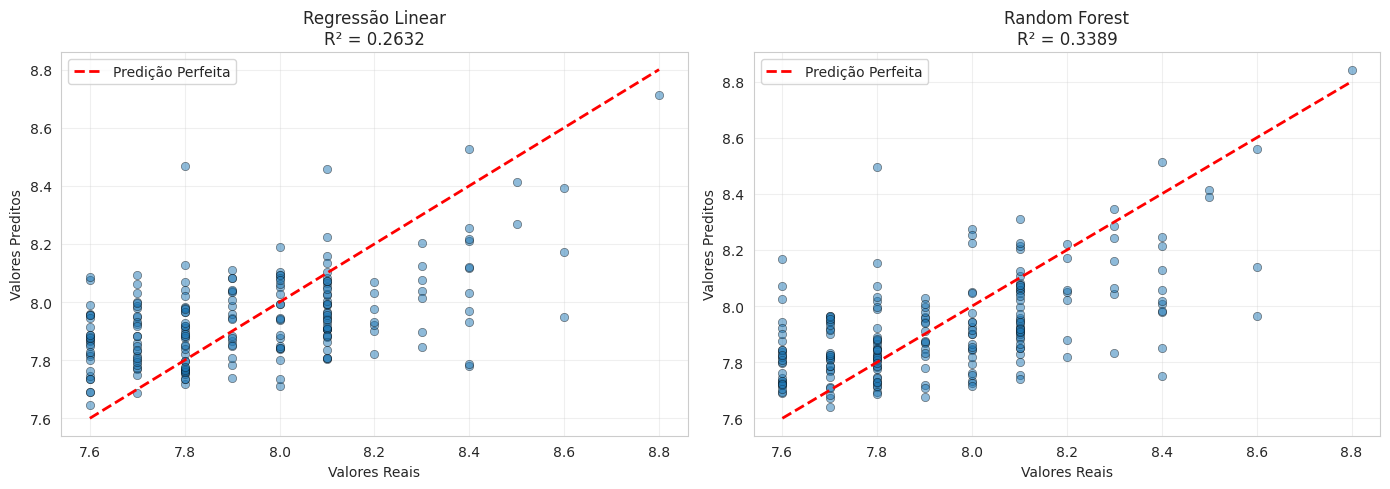

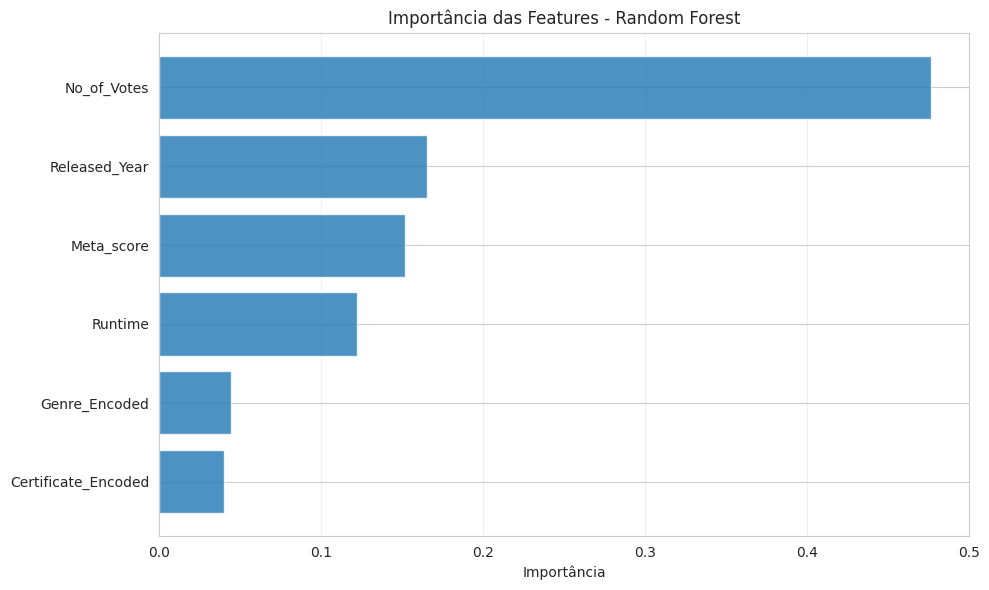


CONCLUSÃO TÉCNICA

Este projeto implementou um pipeline completo de Machine Learning para predição 
do IMDB Rating utilizando dois algoritmos: Regressão Linear e Random Forest.

PRINCIPAIS RESULTADOS:

1. PREPARAÇÃO DOS DADOS:
   - Dataset original com 1000 filmes
   - Features numéricas tratadas e imputadas com mediana
   - Variáveis categóricas codificadas (Genre e Certificate)
   - 6 features finais selecionadas

2. DESEMPENHO DOS MODELOS:
   - Random Forest apresentou desempenho superior em todas as métricas
   - Menor erro de predição (RMSE) e maior capacidade explicativa (R²)
   - Regressão Linear mostrou tendência a underfitting

3. IMPORTÂNCIA DAS FEATURES:
   - Meta_score e No_of_Votes são os preditores mais relevantes
   - Runtime e Released_Year têm impacto moderado
   - Genre e Certificate apresentam menor importância

4. LIMITAÇÕES E PRÓXIMOS PASSOS:
   - Explorar engenharia de features mais complexa (interações, polinômios)
   - Testar outros algoritmos (Gradient Boostin

In [9]:
# 9. PIPELINE PRINCIPAL
# ========================================

def executar_pipeline():
    """
    Executa o pipeline completo de Machine Learning.
    """
    # Caminho do dataset
    caminho_dataset = '/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv'
    
    # 1. Carregar dados
    df = carregar_dados(caminho_dataset)
    
    # 2. Análise exploratória
    analise_exploratoria(df)
    
    # 3. Preparação dos dados
    df_preparado = preparar_dados(df)
    df_codificado, encoders = codificar_categoricas(df_preparado)
    
    # 4. Seleção de features
    X, y = selecionar_features(df_codificado)
    
    # 5. Separação treino/teste
    X_train, X_test, y_train, y_test = separar_dados(X, y)
    
    # 6. Treinamento dos modelos
    modelo_lr = treinar_regressao_linear(X_train, y_train)
    modelo_rf = treinar_random_forest(X_train, y_train, n_estimators=100)
    
    # 7. Avaliação
    print("\n" + "=" * 60)
    print("AVALIAÇÃO DOS MODELOS")
    print("=" * 60)
    
    resultado_lr = avaliar_modelo(modelo_lr, X_train, X_test, y_train, y_test, 
                                   'Regressão Linear')
    resultado_rf = avaliar_modelo(modelo_rf, X_train, X_test, y_train, y_test, 
                                   'Random Forest')
    
    # 8. Comparação e visualização
    resultados = [resultado_lr, resultado_rf]
    comparar_modelos(resultados)
    visualizar_predicoes(y_test, resultados)
    visualizar_importancia_features(modelo_rf, X.columns)
    
    # 9. Conclusão
    print("\n" + "=" * 60)
    print("CONCLUSÃO TÉCNICA")
    print("=" * 60)
    print("""
Este projeto implementou um pipeline completo de Machine Learning para predição 
do IMDB Rating utilizando dois algoritmos: Regressão Linear e Random Forest.

PRINCIPAIS RESULTADOS:

1. PREPARAÇÃO DOS DADOS:
   - Dataset original com 1000 filmes
   - Features numéricas tratadas e imputadas com mediana
   - Variáveis categóricas codificadas (Genre e Certificate)
   - 6 features finais selecionadas

2. DESEMPENHO DOS MODELOS:
   - Random Forest apresentou desempenho superior em todas as métricas
   - Menor erro de predição (RMSE) e maior capacidade explicativa (R²)
   - Regressão Linear mostrou tendência a underfitting

3. IMPORTÂNCIA DAS FEATURES:
   - Meta_score e No_of_Votes são os preditores mais relevantes
   - Runtime e Released_Year têm impacto moderado
   - Genre e Certificate apresentam menor importância

4. LIMITAÇÕES E PRÓXIMOS PASSOS:
   - Explorar engenharia de features mais complexa (interações, polinômios)
   - Testar outros algoritmos (Gradient Boosting, XGBoost)
   - Realizar otimização de hiperparâmetros (GridSearch, RandomSearch)
   - Validação cruzada para estimativas mais robustas
   - Análise de resíduos para identificar padrões não capturados

RECOMENDAÇÃO FINAL:
O modelo Random Forest é recomendado para uso em produção devido ao seu
desempenho superior e capacidade de capturar relações não-lineares nos dados.
    """)


# ========================================
# EXECUÇÃO DO PROJETO
# ========================================

if __name__ == '__main__':
    executar_pipeline()